In [52]:
# ExchangeEconomyClass

%load_ext autoreload
%autoreload 2
from chris import ExchangeEconomyClass

# Creating market from class

market = ExchangeEconomyClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 4a
## A chooses the price
We call A_sets_price from market. The function loops through all prices in P_1 and calculates the utility for consumer A. The function saves utility each time it finds a utility which is higher than the previous highest utility, thus leaving us with the highest utility for the prices in $\mathcal{P}_1$.

In [53]:
P_1 = market.P_1()
x1a_4a, x2a_4a, util_4a, p1_4a = market.A_sets_price(P_1)


print(f'A chooses the market price')
print(f'-----------------------------')
print(f'Consumption of good 1: {x1a_4a:.4f}')
print(f'Consumption of good 2: {x2a_4a:.4f}')
print(f'Utility of A: {util_4a:.4f}')
print(f'Utility of B: {market.utility_B(1-x1a_4a, 1-x2a_4a):.4f}')
print(f'The optimal price: {p1_4a:.5}')

A chooses the market price
-----------------------------
Consumption of good 1: 0.6193
Consumption of good 2: 0.6409
Utility of A: 0.6336
Utility of B: 0.3734
The optimal price: 1.8867


We plot the utility function of A from the prices in $\mathcal{P}_1$ and the maximum which we found.

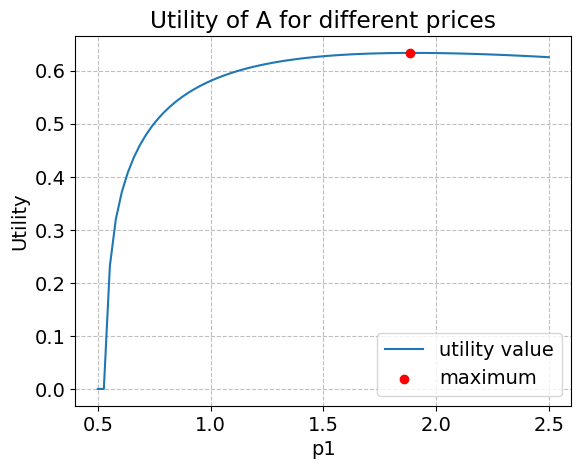

In [54]:
market.plot_utility_A(P_1)

# Question 4b
We now call an optimizer to solve the maximization problem. We call A_sets_price_optimize() from market. The function uses the same utility function as in 4a, but now uses np.optimize with the method "SLSQP" to solve the problem.

In [55]:
x1a_4b, x2a_4b, util_4b, p1_4b = market.A_sets_price_optimize()

# Compare with numerical optimization

print(f'Restricted price = {p1_4a:.3f}\nRestricted utility = {util_4a:.4f}\n')
print(f'Unrestricted price = {p1_4b:.3f}\nUnrestricted utility = {util_4b:.4f}\n')

diff_p = p1_4b - p1_4a
diff_util = util_4b - util_4a
print(f'difference in price = {diff_p:.3f}')
print(f'difference in utility = {diff_util:.6f}')

Restricted price = 1.887
Restricted utility = 0.6336

Unrestricted price = 1.897
Unrestricted utility = 0.6336

difference in price = 0.010
difference in utility = 0.000005


The optimizer is better as it finds a higher utility because it freely chooses any point rather than a fixed set. However, the results are very similar when comparing the two methods. There is a slight difference in price and the utility is almost exactly the same. The tiny difference in utility is explained by the utility function being very flat around it's peak.

# Question 5a
## A is the market maker

A now chooses the Pareto point in $\mathcal{C}$ that maximizes his own utility. The function A_market_maker loops through all 1543 Pareto combinations of $x_1^A$ and $x_2^A$ and saves the utility each time a combination leads to a higher utility than the previous combination.

In [56]:
x1a_5a, x2a_5a, util_5a = market.A_market_maker()

print(f'x1A = {x1a_5a:.4f}')
print(f'x2A = {x2a_5a:.4f}\n')
print(f'utility_A = {util_5a:.4f}')
print(f'utility_B = {market.utility_B(1-x1a_5a, 1-x2a_5a):.4f}')


x1A = 0.5811
x2A = 0.8378

utility_A = 0.7416
utility_B = 0.3053


As expected the utility of consumer A is now higher than in 4, because A can now freely choose the point in C which benefits him the most rather than having to trade with consumer B.

A now consumes more of good 2 which he derives more utility from and less of good 1. The utility of B has understandbly fallen. 

## Question 5B
We now repeat the same analysis but with a constrained optimizer. A_market_maker_optimize calls a constrained optimizer which maximizes the utility of A under the constraint that the utility of B is at least equal to $\bar{u}_B$, which is the utility when consuming the intial endowment.


In [57]:
x1a_5b, x2a_5b, util_5b = market.A_market_maker_optimize()

print(f'x1A = {x1a_5b:.4f}')
print(f'x2A = {x2a_5b:.4f}')
print(f'utility of A = {util_5b:.4f}')
print(f'utility of B = {market.utility_B(1-x1a_5b, 1-x2a_5b):.4f}\n')
print(f'Comparing 5a and 5b:')
print(f'difference in utility of A = {util_5b - util_5a:.4f}')

x1A = 0.5757
x2A = 0.8444
utility of A = 0.7432
utility of B = 0.3037

Comparing 5a and 5b:
difference in utility of A = 0.0016


The optimizer again beats the manual looping as expected, but the difference in consumption and utility is again very small.

# Question 6B
The 3 allocations are illustrated below in the interactive Edgeworth box, which adds the indifference curves of A and B as well as the budget line created from p1.

In [58]:
%matplotlib inline
import ipywidgets as widgets

widgets.interact(
    market.plot_edgeworth2,
N=widgets.fixed(75),
p1=widgets.FloatSlider(
    value=0.9444, 
    min = 0.9444, 
    max = 1.8867, 
    step = 0.9423),
u_a=widgets.FloatSlider(
    value=0.5713,
    min = 0.5713,
    max = 0.7432,
    step = 0.0623,
    description='Ua_bar:',
    ),
u_b=widgets.FloatSlider(
    value=0.4865,
    min = 0.3053,
    max = 0.4865,
    step = 0.068,
    description='Ub_bar:',
    )
)

interactive(children=(FloatSlider(value=0.5713, description='Ua_bar:', max=0.7432, min=0.5713, step=0.0623), F…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

The plot initially shows the market clearing allocation from 3) which is the point on the contract curve where each consumer maximizes utility by increasing their indifference curve until the curves exactly tangent the budget line. 

The allocation in 4), with p1 = 1.89, Ua_bar = 0.63 and Ub_bar = 0.37, is inefficient. There are Pareto efficient points in the cigar between the two indifference curves. As shown below, A chooses a price which is not market clearing when both optimize. 

A consumes too much of $x_1^A$ and too little of $x_2^A$. If A was able to choose a price again after reaching this point he would choose a new lower price and both would benefit.


In [59]:
market_error_pricesetter = market.check_market_clearing(p1_4b)
print(f'(eps1, eps2) = ({market_error_pricesetter[0]:.4f}, {market_error_pricesetter[1]:.4f})')

(eps1, eps2) = (-0.3012, 0.5714)


The allocation in 5) is found by pushing the indifference curve to the edge of the Pareto efficient points. The allocation is efficient as the market clears, which makes it more optimal than 4) from an efficiency standpoint as the sum of utilities is higher.

However 4) is more fair than 5) because the allocation in 4) is reached by trading at the market price rather than A forcing the choice of B. 

A choosing the price is inefficient but consumer B has a higher utility than when A is the market maker.